# ------------------------------------------------------------------------------
# This Example shows how to create a full project from scratch in HFSS and Icepak (linked to HFSS). the project creates
# a setup, solves it and create post processing output. It includes a lot of commands to show pyaedt Capabilities
# -------------------------------------------------------------------------------

In [1]:
import os
import sys
import pathlib
import glob
from IPython.display import Image

This section is needed only to include the reference path into the script 


In [2]:
local_path = os.path.abspath('')
module_path = pathlib.Path(local_path)
aedt_lib_path = module_path.parent.parent.parent
sys.path.append(os.path.join(aedt_lib_path))
print(aedt_lib_path)
pdf_path1 =  os.path.join(aedt_lib_path,"pyaedt","core","dlls", "PDFReport")
sys.path.append(pdf_path1)

C:\GIT\repos\pyaedt


# Import all needed Libraries
AEDLib has 1 Main Module named Desktop which initialzie Electronics Desktop and different modules, one per each application

In [3]:
from pyaedt import Hfss
from pyaedt import Icepak
from pyaedt import Desktop

## Define Project Directory, AEDT Version and Project Name

Project will be run in Graphical Mode

In [4]:
project_dir = os.environ["Temp"]
#project_dir = r"\\ottfiler2na\home1\mcapodif\Ansoft"
project_name = "Test_Jupyter"
project_file = os.path.join(project_dir, project_name + ".aedt")

## Launch Electronics Desktop and Initialize HFSS app

the command 

```Python
aedtapp = Hfss()
```


Initializes the HFSS Design in AEDT. if there is a running HFSS Design the aedtapp will be linked to it, otherwise a new design will be run.

In [5]:
desktopVersion = "2021.1"
NonGraphical = False
NewThread = True
desktop=Desktop(desktopVersion, NonGraphical, NewThread)

Info: Using Windows TaskManager to Load processes
Info: Ansoft.ElectronicsDesktop.2021.1 Started with Process ID 24924
Info: pyaedt v0.5.0 started
Info: Started external COM connection with module pythonnet_v3
Info: Python version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Info: Exe path: C:\Anaconda3\python.exe


In [6]:
aedtapp = Hfss()

Info: Added design 'HFSS_516' of type HFSS
Info: Design Loaded
Info: Successfully loaded project materials !
Info: Materials Loaded


In [7]:
aedtapp

HFSS 2021.1 DrivenModal. ProjectName:Project138 DesignName:HFSS_516 

## Variables Settings

A variable can be initialized simpy by creating it as a list object. if user enter $ then the variable will be created for project otherwise for design.

In [8]:
aedtapp["$coax_length"] = "100mm"
aedtapp["inner"] = "3mm"

Save the Project

In [9]:
aedtapp.save_project(project_file)

Info: Saving Project138 Project


True

## Modeler 
Create the Coaxial, 3 Cylinders.

Parameters can be applied directly to create_cylinder method, also material can be assigned directly to the object creation action.


In [10]:
origin= [0,0,0]
cross_section_plane = aedtapp.CoordinateSystemPlane.XYPlane
id1 = aedtapp.modeler.primitives.create_cylinder(cross_section_plane, origin, "inner", "$coax_length", 0, "inner")
id2 = aedtapp.modeler.primitives.create_cylinder(cross_section_plane, origin, 8, "$coax_length", 0,"teflon_core", matname="teflon_based")
id3 = aedtapp.modeler.primitives.create_cylinder(cross_section_plane, origin, 10, "$coax_length", 0, "outer")
aedtapp.modeler.fit_all()

Alternatively the material can be assigned usign assignmaterial function

In [11]:
aedtapp.modeler.primitives["inner"].faces[0].area

1884.9555921538758

In [12]:
aedtapp.modeler.primitives["inner"].faces[0].edges[1].length

0

In [13]:
aedtapp.modeler.primitives["inner"].faces[0].edges[0].vertices

[Vertex 12]

In [14]:
aedtapp.modeler.primitives["inner"].faces[0].edges[0].midpoint

[0.0, 3.0, 0.0]

In [15]:
aedtapp.modeler.primitives["inner"].faces[1].vertices[0].position

[0.0, 3.0, 0.0]

In [16]:
aedtapp.modeler.primitives["inner"].faces[0].area

1884.9555921538758

In [17]:
aedtapp.modeler.primitives["inner"].faces[1].center

[-7.16082548583184e-33, 2.9446718428928e-15, 8.04061324838318e-15]

In [18]:
aedtapp.assignmaterial(["inner", "outer"], "Copper")

Info: Assign Material copper to object inner,outer


True

## Modeler Operations

Subtract, add, etc. can be done using id of object or object name

In [19]:
aedtapp.modeler.subtract(id3, id2, True)
aedtapp.modeler.subtract("teflon_core", "inner", True)

True

## Mesh Operations



In [20]:
aedtapp.mesh.assign_initial_mesh_from_slider(6)
aedtapp.mesh.assign_model_resolution([aedtapp.modeler.primitives.get_obj_name(id1), aedtapp.modeler.primitives.get_obj_name(id3)], None)
aedtapp.mesh.assign_length_mesh(aedtapp.modeler.primitives.get_object_faces(id2), False, 1, 2000)


In [21]:
aedtapp.mesh.meshoperations


In [22]:
aedtapp.mesh.meshoperations[0].props["MaxLength"]="2mm"
aedtapp.mesh.meshoperations[0].update()

True

## Automatic Excitations Creation


In [23]:
aedtapp.create_wave_port_between_objects("inner", "outer",axisdir=0, add_pec_cap=True, portname="P1")
aedtapp.create_wave_port_between_objects("inner", "outer",axisdir=3, add_pec_cap=True, portname="P2")
portnames = aedtapp.get_all_sources()
print(portnames)

Info: Deleted 1 Objects
Info: Deleted 1 Objects
Info: Connection Correctly created
Info: Assign Material pec to object inner_ObjectFromEdge1_1
Info: Deleted 1 Objects
Info: Deleted 1 Objects
Info: Connection Correctly created
Info: Assign Material pec to object inner_ObjectFromEdge2_1
['P1', 'P2']


## Setup Generation

In [24]:
setup = aedtapp.create_setup("MySetup")
setup.props["Frequency"] = "1GHz"
setup.props["MaximumPasses"] = 1
setup.update()

True

In [25]:
sweepname = aedtapp.create_frequency_sweep("MySetup", "GHz", 0.8, 1.2)

In [26]:
aedtapp.setups[0].sweeps[0].props

{'Type': 'Interpolating',
 'isenabled': True,
 'RangeType': 'LinearCount',
 'RangeStart': '0.8GHz',
 'RangeEnd': '1.2GHz',
 'SaveSingleField': False,
 'RangeCount': 451,
 'RangeStep': '1MHz',
 'RangeSamples': 11,
 'SaveFields': True,
 'SaveRadFields': True,
 'GenerateFieldsForAllFreqs': False,
 'InterpTolerance': 0.5,
 'InterpMaxSolns': 250,
 'InterpMinSolns': 0,
 'InterpMinSubranges': 1,
 'InterpUseS': True,
 'InterpUsePortImped': False,
 'InterpUsePropConst': True,
 'UseDerivativeConvergence': False,
 'InterpDerivTolerance': 0.2,
 'EnforcePassivity': True,
 'UseFullBasis': True,
 'PassivityErrorTolerance': 0.0001,
 'EnforceCausality': False,
 'UseQ3DForDCSolve': False,
 'SMatrixOnlySolveMode': 'Auto',
 'SMatrixOnlySolveAbove': '1MHz',
 'SweepRanges': []}

In [27]:
#aedtapp.submit_job("ott02winlm01")


# ICEPAK Model Creation
## Import model from HFSS

In [28]:
ipkapp = Icepak()
ipkapp.solution_type= ipkapp.SolutionTypes.Icepak.SteadyTemperatureAndFlow
ipkapp.copy_solid_bodies_from(aedtapp)

Info: Added design 'Icepak_URT' of type Icepak
Info: Design Loaded
Info: Successfully loaded project materials !
Info: Materials Loaded


True

## Assign Losses from HFSS
A multiphysics Analysis requires that two solvers are linked and first solver outputs represents second solver inputs.
In this example HFSS Losses will generate heat which Icepak will capture and solve

In [29]:
surfaceobj = ["inner", "outer"]
ipkapp.assign_em_losses(aedtapp.design_name, "MySetup", "LastAdaptive", "1GHz", surfaceobj, paramlist=["$coax_length", "inner"])

Info: Mapping HFSS EM Lossess
Info: Found 4 Objects
Info: EM losses Mapped from design HFSS_516


In [30]:
ipkapp.edit_design_settings(aedtapp.GravityDirection.ZNeg)

True

## Setup Project in Icepak

When you create a setup, default settings will be applied
When you need to change a property of the setup you can use props command and pass the right value to the property value. The update function will apply the settings to the setup

In [31]:
setup_ipk = ipkapp.create_setup("SetupIPK")
setup_ipk.props["Convergence Criteria - Max Iterations"] = 3
setup_ipk.update()

True

## Mesh Settings

In [32]:
airbox = ipkapp.modeler.primitives.get_obj_id("Region")
ipkapp.modeler.primitives[airbox].display_wireframe(True)

True

In [34]:
airfaces = ipkapp.modeler.primitives.get_object_faces(airbox)
ipkapp.assign_openings(airfaces)

Info: Face List boundary_faces created
Info: Opening Assigned


## Cloase and Open Projects
This command shows how to save, close and load projects. This can be helpful in case of operations on multiple projects.


In [35]:
aedtapp.save_project()
aedtapp.close_project(project_name)
aedtapp.load_project(project_file)
ipkapp = Icepak()
ipkapp.modeler.fit_all()

Info: Saving Test_Jupyter Project
Info: Closing the specified Test_Jupyter AEDT Project
Info: Design Loaded
Info: Successfully loaded project materials !
Info: Materials Loaded


# Solve Icepak
Icepak will solve also 
Solve HFSS Sweep when Icepak is finished

In [36]:
setup1 = ipkapp.analyze_setup("SetupIPK")
aedtapp.save_project()

Info: Solving design setup SetupIPK
Info: Saving Test_Jupyter Project


True

# Solve HFSS

In [37]:
aedtapp.modeler.fit_all()
aedtapp.analyze_setup("MySetup")

Info: Solving design setup MySetup


True

# Plot and Export
## Generating images and Field Plots
This section we generate Field Plots on HFSS Projects and we export it as an image
** NOTE, the generation and export of jpg works only if AEDT is launched in graphical mode **


In [38]:
cutlist = ["Global:XY", "Global:XZ", "Global:YZ"]
vollist = [aedtapp.modeler.primitives.get_obj_name(id2)]
setup_name = "MySetup : LastAdaptive"
quantity_name = "ComplexMag_E"
quantity_name2 = "ComplexMag_H"
surflist = aedtapp.modeler.primitives.get_object_faces(id1)
intrinsic = {"Freq": "1GHz", "Phase": "0deg"}
plot1 = aedtapp.post.create_fieldplot_cutplane(cutlist, quantity_name, setup_name, intrinsic)
plot1.IsoVal = "Tone"
plot1.modify_folder()
results_folder = os.path.join(aedtapp.project_path,"Coaxial_Results")
if not os.path.exists(results_folder):
    os.mkdir(results_folder)
    

In [39]:
aedtapp.post.export_field_image_with_View(plot1.name, os.path.join(results_folder, "HFSS1.jpg"))
plot2 = aedtapp.post.create_fieldplot_volume(vollist, quantity_name2, setup_name, intrinsic)
aedtapp.post.export_field_image_with_View(plot2.name, os.path.join(results_folder, "HFSS2.jpg"))
plot3 = aedtapp.post.create_fieldplot_surface(surflist, quantity_name, setup_name, intrinsic)
aedtapp.post.export_field_image_with_View(plot3.name, os.path.join(results_folder, "HFSS3.jpg"))

True

# Plot the exported 3D Field

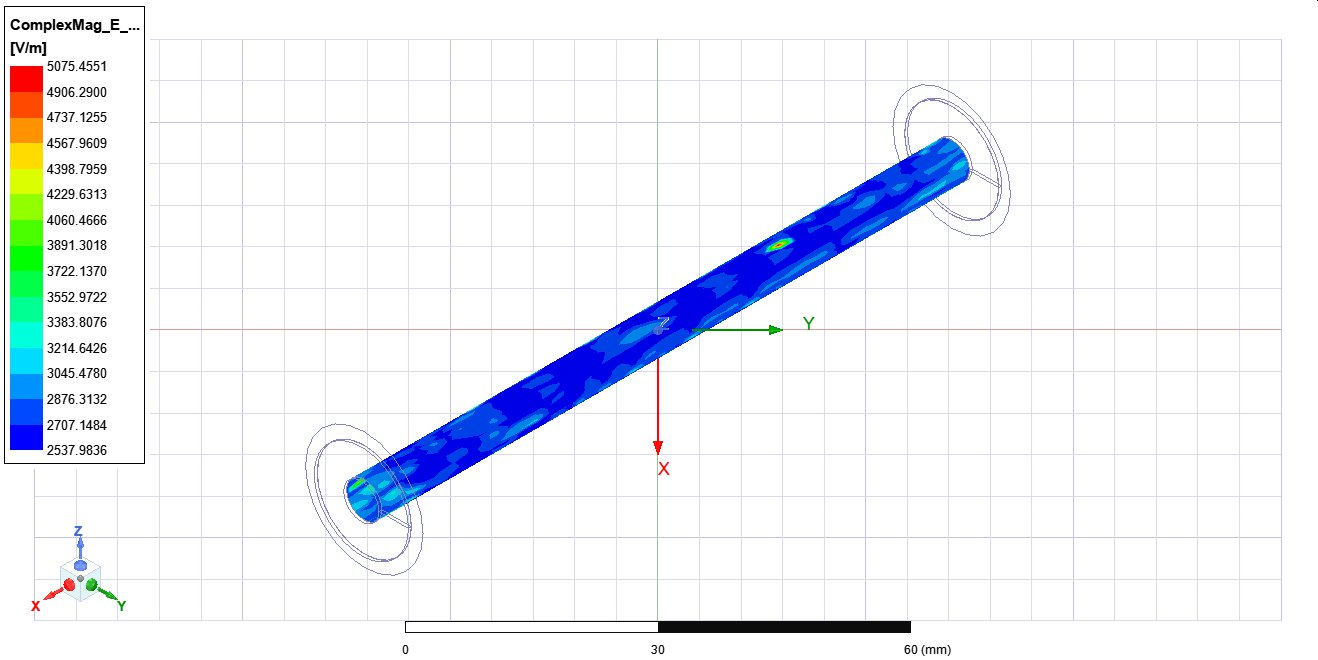

In [40]:
Image(filename=os.path.join(results_folder, "HFSS3.jpg")) 

# Create Scattering Plot and exporting it to jpg file
By default, it uses the default sweep and the plots all the output

# Chart with only all Scattering Parameters

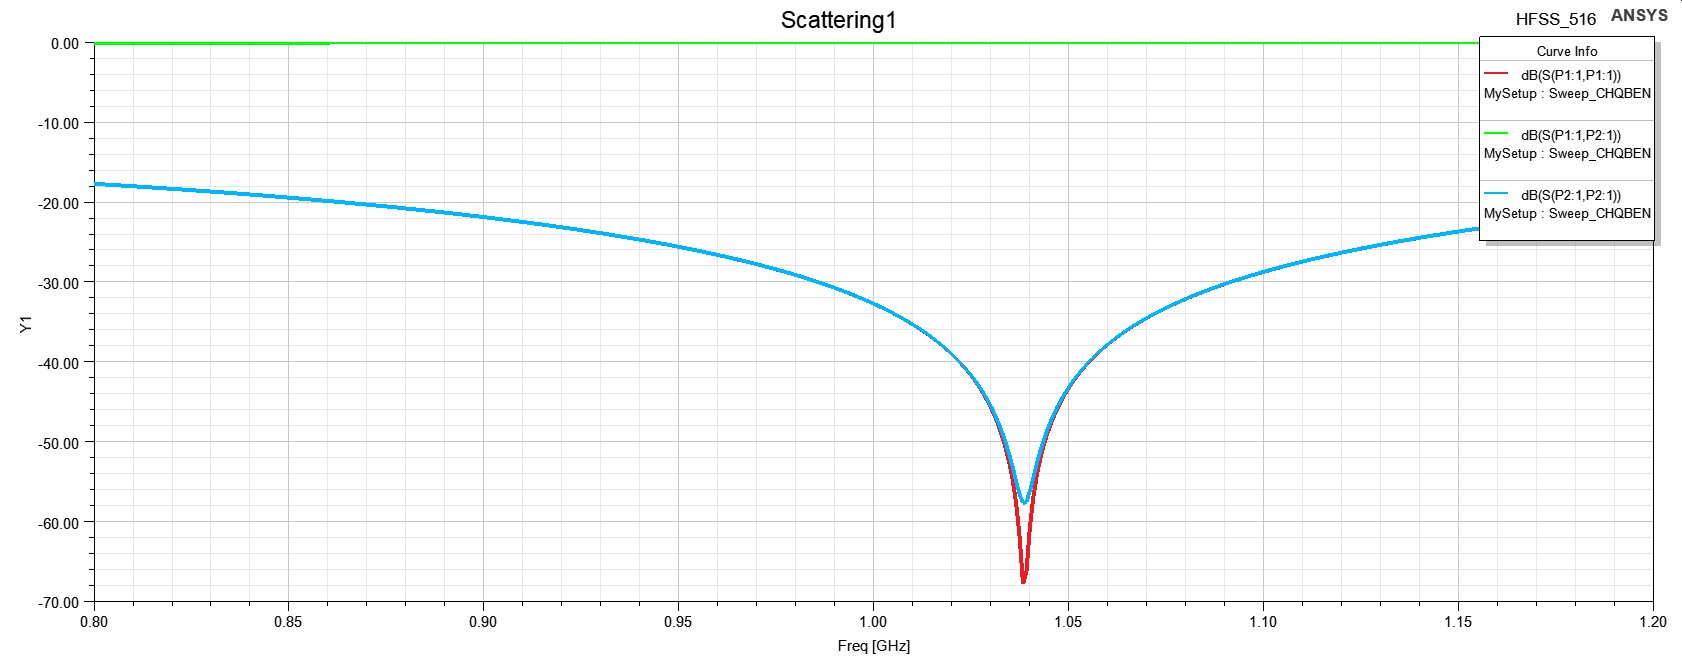

In [41]:
aedtapp.create_scattering("Scattering1")
aedtapp.post.export_report_to_jpg(results_folder, "Scattering1")
Image(filename=os.path.join(results_folder, "Scattering1.jpg")) 

# Chart with only 1 Scattering Parameter

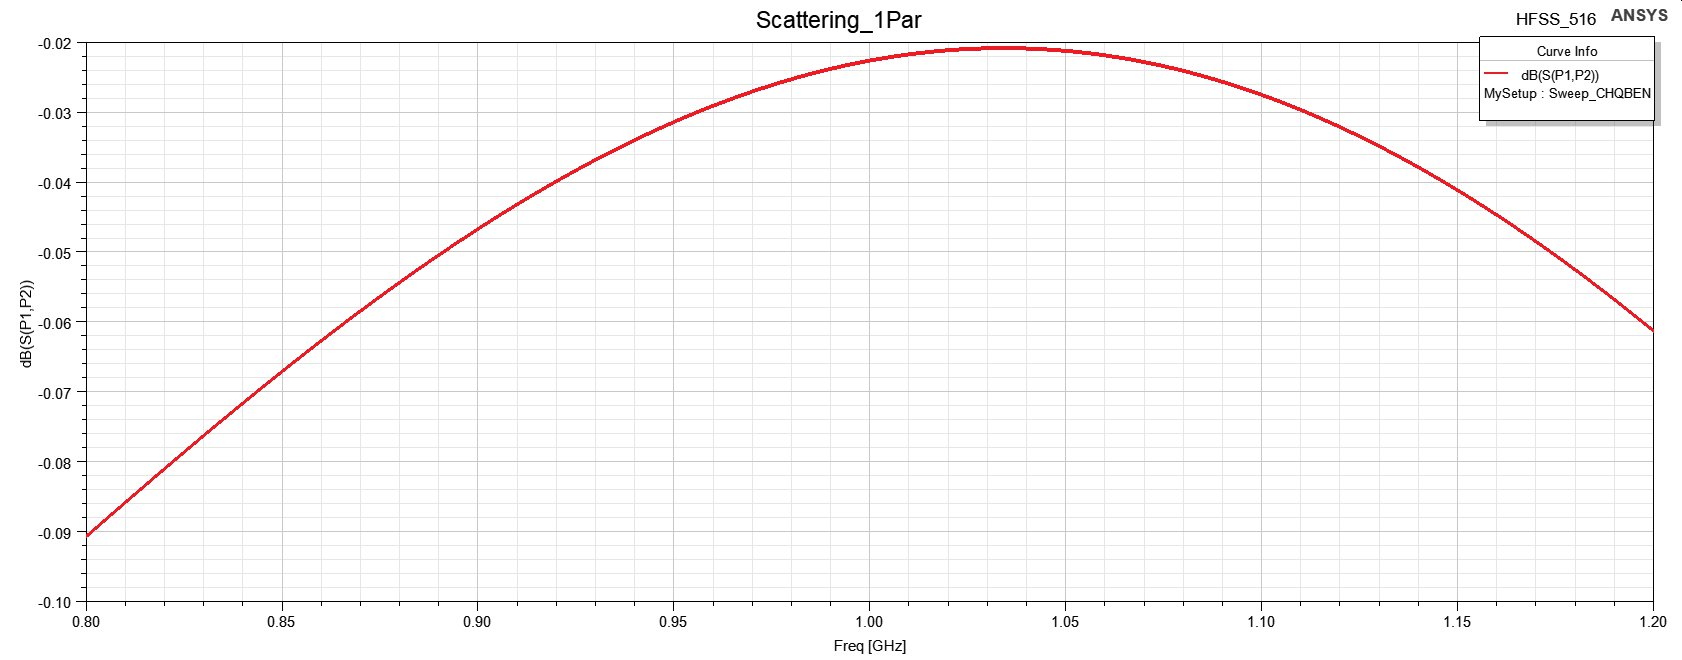

In [42]:
aedtapp.create_scattering("Scattering_1Par", PortNames="P1", PortExcited="P2")
aedtapp.post.export_report_to_jpg(results_folder, "Scattering_1Par")
Image(filename=os.path.join(results_folder, "Scattering_1Par.jpg")) 

# Create Icepak Plots and export
Functions are exactly the same as seen above for HFSS. Only the Quantity is different. 

In [43]:
quantity_name = "Temperature"
setup_name = ipkapp.existing_analysis_sweeps[0]
intrinsic = ""
surflist = ipkapp.modeler.primitives.get_object_faces("inner")
plot5 = ipkapp.post.create_fieldplot_surface(surflist, "SurfTemperature")
ipkapp.post.export_field_image_with_View(plot5.name, os.path.join(results_folder, "SurfXZ.jpg"), view="XZ")
ipkapp.post.export_field_image_with_View(plot5.name, os.path.join(results_folder, "SurfXY.jpg"), view="YZ")
plot4 = ipkapp.post.create_fieldplot_cutplane(cutlist, quantity_name)
ipkapp.post.export_field_image_with_View(plot4.name, os.path.join(results_folder, "FaceIso.jpg"))
ipkapp.post.export_field_image_with_View(plot4.name, os.path.join(results_folder, "FaceXZ.jpg"), view="XZ")
ipkapp.post.export_field_image_with_View(plot4.name, os.path.join(results_folder, "FaceXY.jpg"), view="XY")
ipkapp.post.export_field_image_with_View(plot4.name, os.path.join(results_folder, "FaceYZ.jpg"), view="YZ")
ipkapp.post.export_field_file_on_grid("Temp", setup_name, ipkapp.available_variations.nominal_w_values,
                                    os.path.join(project_dir, "Temp.fld"),grid_stop=[10,10,10], grid_step=[1,1,1])
aedtapp.save_project()
aedtapp.close_project(aedtapp.project_name)

Info: Exporting Temp Field. Be Patient
Info: Saving Test_Jupyter Project
Info: Closing the specified Test_Jupyter AEDT Project


True

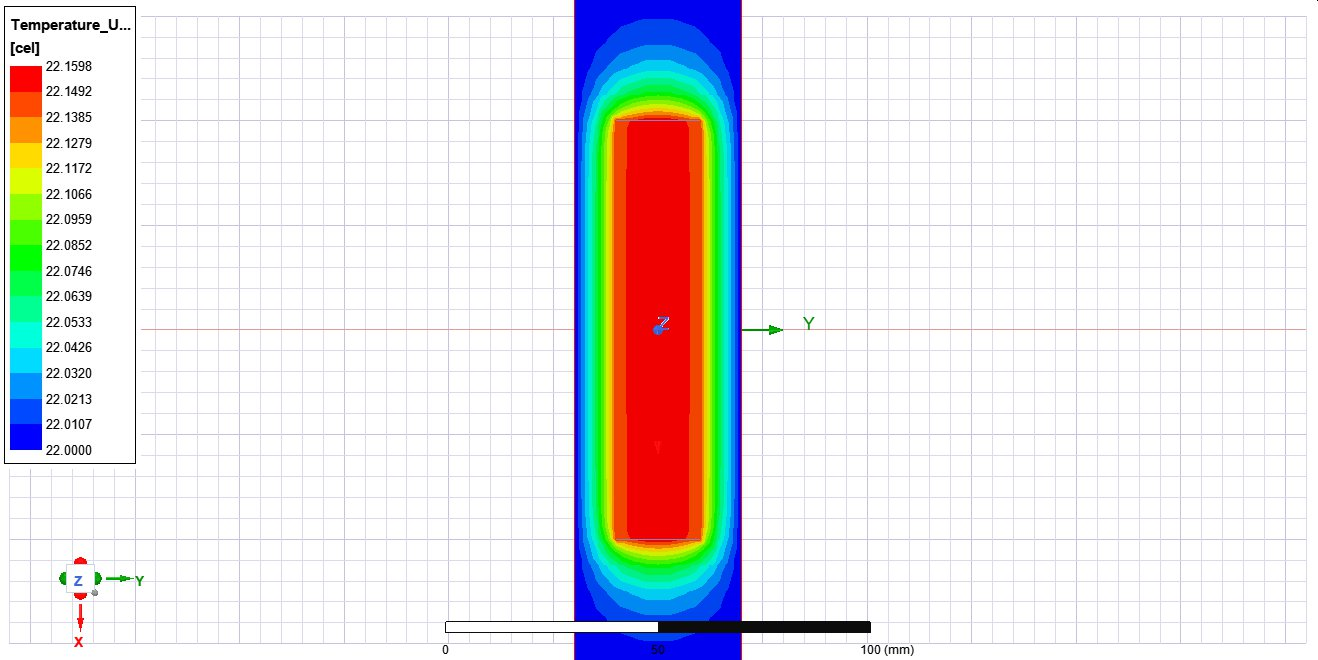

In [44]:
Image(filename=os.path.join(results_folder, "FaceXY.jpg")) 

# Generating PDF Report

In [46]:
import clr
clr.AddReference("AnsysReport")
from pyaedt.application.DataHandlers import create_table_for_csharp, create_list_for_csharp
import AnsysReport
report = AnsysReport.CreatePdfReport()

report.Specs.ModelName = "Coaxial"
report.Specs.Revision = "Rev1"

report.Specs.AnsysVersion = "2020R2"
report.Specs.ProjectName = "MyCoaxial"
report.AddAnsysHeader()
report.AddFirstPage()
section2 = report.CreateNewSection()

report.AddChapter("Simulation Results")
testo = "The project name is " + report.Specs.ProjectName + "."
report.AddText(testo)
imagefiles = glob.glob(results_folder + "/*.jpg")
for img in imagefiles:
    report.AddImageWithCaption(img, img, 13)

report.AddChapter("Project Variables")

my_table = [["$dim", "$height"], ["5mm", "10mm"]]

mytable = create_table_for_csharp(my_table, True)
report.AddTableFromList("Project Variables", mytable, True, True)

report.AddTableOfContent()
filename=report.SavePDF(results_folder)
os.startfile(os.path.join(results_folder,filename))

# Close AEDT and Closed Project

In [47]:
desktop.force_close_desktop()